<a href="https://colab.research.google.com/github/DarkMagicianK/Comenzado-con-Pytorch/blob/main/Tp3/Tp3_ejercicio0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N°0
Jugando con el iris dataset

In [7]:
#@title 0.- Import de lib a usar y funciones adicionales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from scipy.stats import norm
import os


Atributos
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


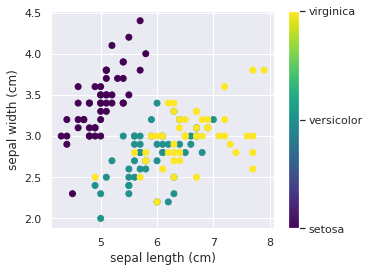

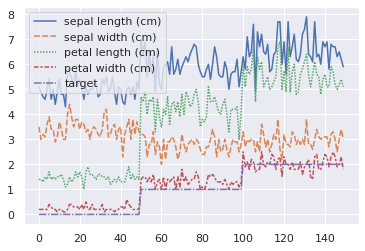

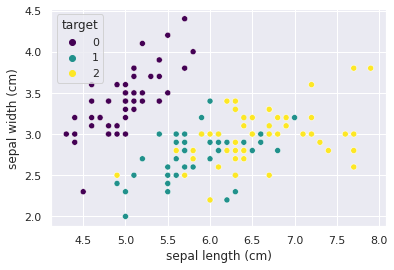

In [8]:
#@title 1.- Empezando con el data Iris: visualización
os.system("cls")
from sklearn.datasets import load_iris
iris = load_iris();
print ("Atributos")
print (iris.feature_names)

X = iris.data
x1_index = 0
x2_index = 1

x1 = X[:,x1_index]
x2 = X[:,x2_index]

#%%
# Plots 2D entre dos features
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5,4));
plt.scatter(x1,x2,c=iris.target,cmap="viridis");
plt.colorbar(ticks=[0, 1, 2],format=formatter)
#plt.colorbar(ticks=[1, 2, 3])
#plt.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar
plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])

# Dataframe 
_,ax1 = plt.subplots()
df_x = pd.DataFrame(iris.data,columns=iris.feature_names)
df_x['target'] = iris.target
sns.lineplot(data=df_x,ax=ax1)

_,ax2 = plt.subplots()
sns.scatterplot(data=df_x, x=df_x.columns.values[x1_index], y=df_x.columns.values[x2_index],
                hue='target',palette="viridis", ax=ax2)

names_x -> ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'target']
names_target ['setosa' 'versicolor' 'virginica']
ind -> [0] , Predicción x_new -> ['setosa']


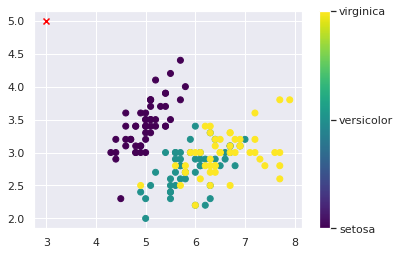

In [9]:
#@title 2.- Empezando con el data Iris: clasificación k-vecinos

from sklearn.neighbors import KNeighborsClassifier

df_x = pd.DataFrame(iris.data,columns=iris.feature_names)
df_x['target'] = iris.target
names_x = df_x.columns.values
names_target = iris.target_names
print('names_x ->',names_x)
print('names_target',names_target)
XX = df_x[ names_x[[x1_index,x2_index]] ]
yy = df_x['target']

# Ajuste del modelo
param_k = 1;
knn = KNeighborsClassifier(n_neighbors=param_k)
#knn2.fit(XX, yy)
knn.fit(XX.to_numpy(), yy.to_numpy())

# Predicción
#x_new = pd.DataFrame([[3, 5]]);
x_new = [[3, 5]]
print('ind ->',knn.predict(x_new),', Predicción x_new ->',names_target[knn.predict(x_new)]);

plt.scatter(x1,x2,c=iris.target,cmap="viridis");
plt.colorbar(ticks=[0, 1, 2],format=formatter)
plt.scatter(x_new[0][0],x_new[0][1],c="red",marker="x");




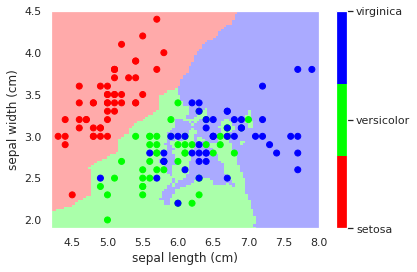

In [10]:
#@title 3.- Regiones definidas según el clasificador

def regiones_knn(X,y,K,pts,figs=1):
  # Fiteo
  knn = KNeighborsClassifier(n_neighbors=K);
  knn.fit(X, y)

  if figs:
    #% Predicción Mesh
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, pts),
                        np.linspace(y_min, y_max, pts));
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot also the training points
    from matplotlib.colors import ListedColormap
    # Create color maps for 3-class classification problem, as with iris
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z,cmap=cmap_light)
    plt.scatter(x1,x2,c=iris.target,cmap=cmap_bold);
    plt.colorbar(ticks=[0, 1, 2],format=formatter)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    
  #return knn_score,m_acc,m_balanced_acc,m_f1,m_pres,m_recall
# -----------------------------------------------------------------------

param_k = 3; # Hiper parametro
pts = 100;   # para armar la grilla
X, y = iris.data[:,(x1_index,x2_index)], iris.target;
regiones_knn(X,y,param_k,pts)


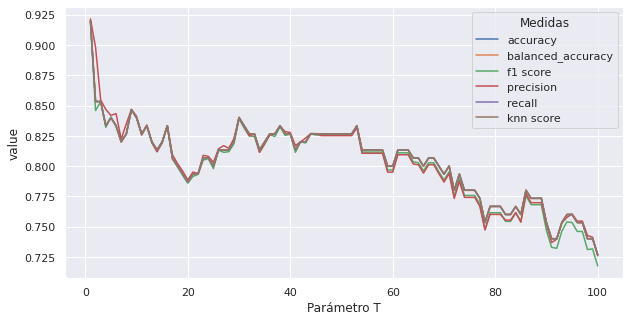

In [18]:
#@title 4.- Metricas

def metricas(X,y,y_pred,average):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn import metrics
  #print([[y,y_pred]])
  m_accuracy = metrics.accuracy_score(y,y_pred)
  m_balanced_accuracy = metrics.balanced_accuracy_score(y,y_pred)
  m_f1 = metrics.f1_score(y,y_pred, average=average)
  m_precision = metrics.precision_score(y,y_pred, average=average,zero_division=1)
  m_recall = metrics.recall_score(y,y_pred, average=average,zero_division=0)

  return m_accuracy,m_balanced_accuracy,m_f1,m_precision,m_recall

# --------------------------------------------------------
N = 100;
average = 'weighted' #'binary' 

parametro = np.zeros(N)
knn_score = np.zeros(N)
m_accuracy = np.zeros(N)
m_balanced_accuracy = np.zeros(N)
m_f1 = np.zeros(N)
m_precision = np.zeros(N)
m_recall = np.zeros(N)

# Fiteo
X = iris.data[:,(x1_index,x2_index)]
y = iris.target

for k in range(N):
    parametro[k] = k+1
    knn = KNeighborsClassifier(n_neighbors=k+1)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    knn_score[k] = knn.score(X,y)
    m_accuracy[k],m_balanced_accuracy[k],m_f1[k],m_precision[k],m_recall[k] = metricas(X,y,y_pred,average)

df_score = pd.DataFrame({'Parámetro T':parametro,'accuracy': m_accuracy,'balanced_accuracy': m_balanced_accuracy,
                        'f1 score':m_f1,'precision':m_precision,'recall':m_recall})
df_score['knn score'] = knn_score

_,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=pd.melt(df_score, 'Parámetro T',var_name='Medidas'),x='Parámetro T', y='value', hue='Medidas',ax=ax )


In [12]:
#@title Celda de prueba
X = iris.data[:,(x1_index,x2_index)]
y = iris.target



